k-nearest neighbors regression in scikit-learn
k-nearest neighbors regression is implemented in scikit-learn using KNeighborsRegressor(). Useful parameters are described in the table below. Additional parameters and details can be found in the scikit-learn documentation. The model.kneighbors(X) method returns the indices and distances of the k nearest neighbors for X.
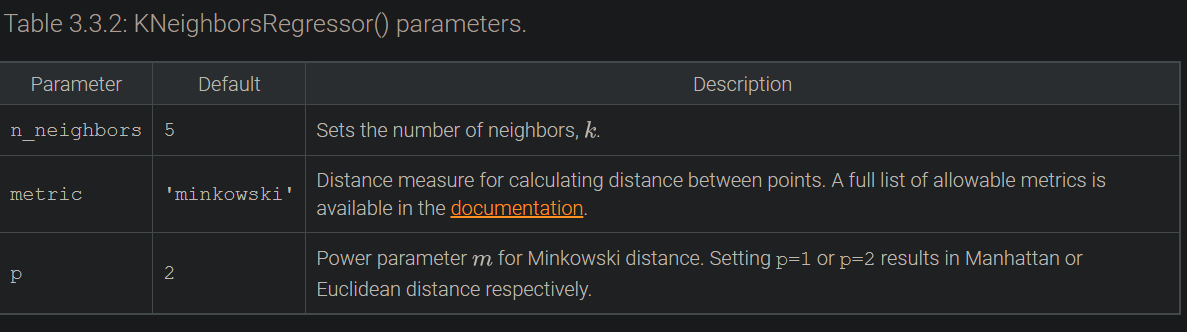

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Load the dataset
rent_all = pd.read_csv('rent18.csv')

# Keep subset of features, drop missing values
rent = rent_all[rent_all['city']=='san jose']
rent = rent[['price', 'beds', 'baths', 'sqft']].dropna()
rent.head()

,price,beds,baths,sqft
1844,1800,3.0,2.0,1280.0
1846,3995,3.0,2.5,1739.0
1847,2774,2.0,1.0,973.0
1850,2560,3.0,1.0,880.0
1855,2650,2.0,1.0,850.0


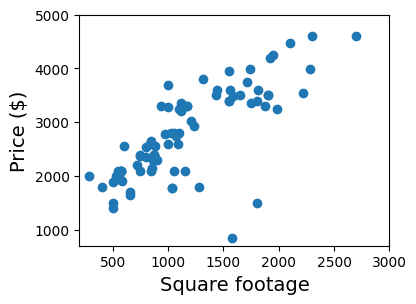

In [3]:
# Predict price from sqft
# Define input and output features
X = rent[['sqft']]
y = rent[['price']]


# Plot sqft and price
fig = plt.figure(figsize = (4,3))
plt.scatter(X, y, color='#1f77b4')
plt.xlabel('Square footage', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.ylim([700,5000])
plt.xlim([200, 3000])

plt.show()

In [4]:
# Initiate and fit a k-nearest neighbors regression model with k=5
knnr = KNeighborsRegressor(n_neighbors=5)
knnrFit = knnr.fit(X,y)

In [5]:
# Define a new instance with 2000 square feet
Xnew = [[2000]]

# Predict price for new instance
neighbors = knnrFit.predict(Xnew)
neighbors

c:\Users\Gabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[3935.]])

In [6]:
# Find the 5 nearest neighbors for the new instance
neighbors = knnrFit.kneighbors(Xnew)

# Return only the distances between the new instance and each of the the 5 nearest neighbors
neighbors[0]

c:\Users\Gabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[ 17.,  50.,  75., 100., 100.]])

In [7]:
# Return the data frame instances of the 5 nearest neighbors
rent.iloc[neighbors[1][0]]

,price,beds,baths,sqft
2018,3250,3.0,2.5,1983.0
2000,4250,4.0,3.0,1950.0
2026,4200,3.0,2.5,1925.0
1983,3500,3.0,2.5,1900.0
1997,4475,4.0,3.0,2100.0


Instances in the neighborhood have similar square footage, but different numbers of bedrooms and bathrooms. Adding beds and baths as input features, in addition to square footage, seems reasonable.


c:\Users\Gabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


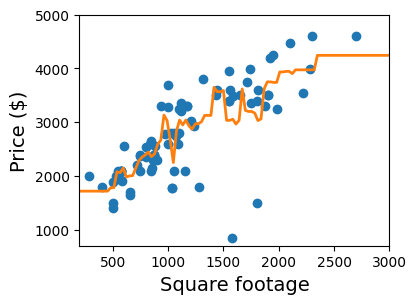

In [8]:
# Plot data with k-nearest neighbors prediction
Xvals=np.linspace(200, 3000, 100).reshape(-1, 1)
knnrPred = knnr.predict(Xvals)

fig = plt.figure(figsize = (4,3))
plt.scatter(X, y, color='#1f77b4')
plt.plot(Xvals, knnrPred, color='#ff7f0e', linewidth=2)
plt.xlabel('Square footage', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.ylim([700,5000])
plt.xlim([200, 3000])

plt.show()

In [9]:
# Define input features as sqft, beds, and baths
X = rent[['sqft', 'beds', 'baths']]
y = rent[['price']]

# Scale the input features
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

In [23]:
# Initiate and fit a k-nearest neighbors regression model with k=5 on unscaled input features
knnrUnscaled = KNeighborsRegressor(n_neighbors=5)
knnrUnscaledFit = knnrUnscaled.fit(X, y)
knnrUnscaledFit.predict([[2000,2,2]])

c:\Users\Gabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[3740.]])

In [24]:
# Initiate and fit a k-nearest neighbors regression model with k=5 on scaled input features
knnrScaled = KNeighborsRegressor(n_neighbors=5)
knnrScaledFit = knnrScaled.fit(Xscaled, y)
knnrScaledFit.predict([[2000,2,2]])

array([[4243.8]])

In [12]:
# Define new instance with 2000 square feet, 2 bedrooms, 1 bathroom
Xsqft = 2000
Xbeds = 2
Xbaths = 1
Xnew = [[Xsqft, Xbeds, Xbaths]]
Xnew

[[2000, 2, 1]]

In [13]:
# Predict price for new instance using unscaled input features
print("Prediction from unscaled input features: ", knnrUnscaledFit.predict(Xnew)[0][0])

# Predict price for new instance using scaled input features
# Find scaled input features for new instance
XsqftScaled = (Xsqft - rent['sqft'].mean())/(rent['sqft'].var()**.5)
XbedsScaled = (Xsqft - rent['beds'].mean())/(rent['beds'].var()**.5)
XbathsScaled = (Xsqft - rent['baths'].mean())/(rent['baths'].var()**.5)

XnewScaled = [[XsqftScaled, XbedsScaled, XbathsScaled]]

print("Prediction from scaled input features: ",knnrScaledFit.predict(XnewScaled)[0][0])

Prediction from unscaled input features:  3740.0
Prediction from scaled input features:  3953.0


c:\Users\Gabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [14]:
# Unscaled nearest neighbors
rent.iloc[knnrUnscaledFit.kneighbors(Xnew)[1][0]]

c:\Users\Gabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


,price,beds,baths,sqft
2018,3250,3.0,2.5,1983.0
2000,4250,4.0,3.0,1950.0
2026,4200,3.0,2.5,1925.0
1983,3500,3.0,2.5,1900.0
1993,3500,4.0,2.5,1900.0


In [28]:
# Scaled nearest neighbors
rent.iloc[knnrScaledFit.kneighbors(XnewScaled)[1][0]]

,price,beds,baths,sqft
1959,3495,3.0,3.5,1587.0
2000,4250,4.0,3.0,1950.0
1997,4475,4.0,3.0,2100.0
1886,3550,4.0,3.0,2222.0
1963,3995,4.0,3.0,2280.0
